___

# PROJETO 3

## GRUPO:
### Lucas Chen Alba
___

In [210]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import math

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\chend\Documents\GitHub\CD1S17\Projeto 3


## Estudo da Distribuição da Média Amostral  $\bar{X}$  via SIMULAÇÃO

# 1

Média real da população: 0.999532792433

Variância dos dados 1.00087148295


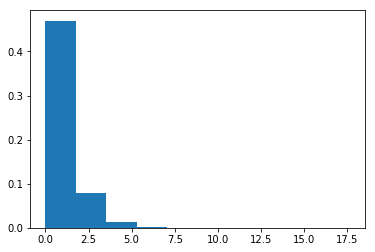

In [206]:
expo = stats.expon.rvs(size = 1000000)
plt.hist(expo, normed = 1)
print ('Média real da população:', expo.mean())
print ()
print ('Variância dos dados', expo.var())

Média real da população: 1.000197859

Variância dos dados 0.999754815787


# 2

In [204]:

def tlc (n):
    listamedias = []
    x3 = []
    x15 = []

    for j in range (0,10000):
        amostra = []
        for i in range(n):
            amostra.append(np.random.choice(expo))
    
        listamedias.append(np.mean(amostra))
        
        if len(amostra) > 20:
            x3.append(amostra[2])
            x15.append(amostra[14])

            
    plt.hist(listamedias, color = "Navy", alpha = 0.5, normed = 1, label = 'Médias amostrais', bins = 20)
    plt.legend(loc = 'best')

            

    print ('Amostras de tamanho:', n)
    print ('Média das médias das amostras:', np.mean(listamedias))
    print ('Variância das médias:', np.var(listamedias))

    
    if len(amostra) > 49:

        fig, axs = plt.subplots(figsize=(8, 5))
        plt.title('Histogramas dos valores das médias')
        plt.xlabel("Valores")
        plt.ylabel("Frequência relativa")
        
        plt.hist(x3, color = "IndianRed", alpha = 0.5, normed = 1, label = 'Terceiros valores', bins = 20)
        plt.hist(x15, color = "Lime", alpha = 0.5, normed = 1, label = 'Quintos valores', bins = 20)
        plt.legend(loc = 'best')

        cov = 0
        for i in range (len(x3)):
            cov += (x3[i] - np.mean(x3)) * (x15[i] - np.mean(x15)) / (len(x3))
        print ('Correlação entre os valores de X3 e X15 (amostras aletórias retiradas de X):', cov/(np.std(x3)*np.std(x15)))


    
    


Amostras de tamanho: 2
Média das médias das amostras: 0.998119501199
Variância das médias: 0.506124048624


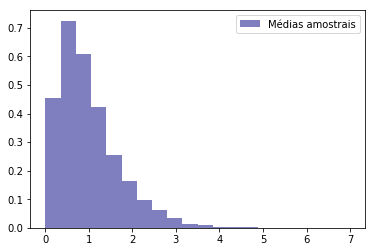

In [192]:
tlc(2)

Amostras de tamanho: 4
Média das médias das amostras: 0.999866936385
Variância das médias: 0.24471461325


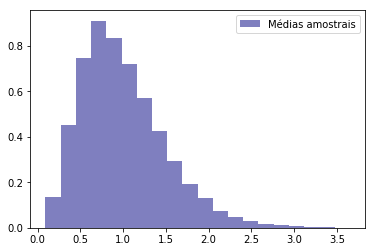

In [193]:
tlc (4)

Amostras de tamanho: 20
Média das médias das amostras: 1.00200074892
Variância das médias: 0.0510243429013


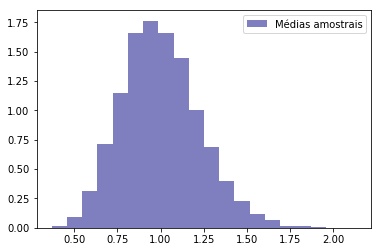

In [194]:
tlc (20)

Amostras de tamanho: 50
Média das médias das amostras: 1.00255129899
Variância das médias: 0.0204241923353
Correlação entre os valores de X3 e X15 (amostras aletórias retiradas de X): 0.00316715872879


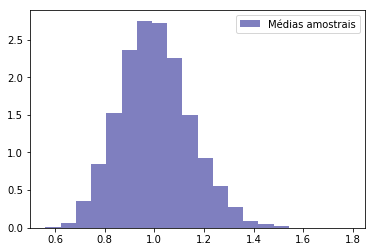

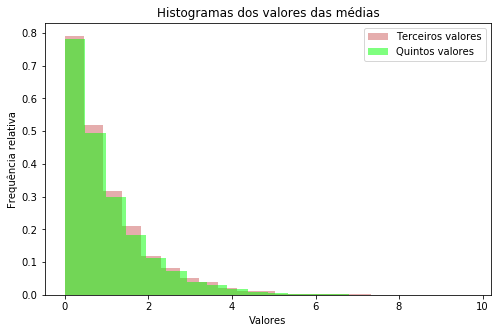

In [205]:
tlc (50)

### Analisando os histogramas das médias coletadas a partir da população expo (lista com 1 milhão de valores que seguem uma distribuição exponencial), percebemos que eles vão se aproximando cada vez mais de uma normal. Estes histogramas foram plotados a partir de dados de uma lista, a qual contém valores das médias de pequenas amostras da nossa população. Ao aumentarmos o número de amostras coletadas para o cálculo da média, os valores tendem a formar uma normal, cuja variância vai tendendo a 0 quando tendemos o número de amostras ao infinito, assim teoricamente chegamos no valor da média da população. Isso deve se ao fato de que quando analisamos as médias dos valores extraídos da população, ele irá nos retornar uma distribuição de probabilidade da média da população,.Chegamos em uma probabilidade alta da média ser a real média quando n (número de elementos dos quais será extraída a média) tende ao infinito, pois essa amostra terá tantos valores que terá praticamente os mesmos valores da população em si, nos retornando uma distribuição com praticamente 100% de certeza da média da população real.

### A distribuição de X3 e X15 parecem se aproximar bastante da distribuição de X. O que parece razoável, uma vez que X3 e X15 foram construídas aleatoriamente a partir das amostras (também aleatórias) de X.

### A baixa correlação entre as amostras aleatórias X3 e X15 indica uma independência entre elas. O que parece correto, uma vez que são amostras aleatórias.

___
## Estudo da Distribuição de  $\frac{\bar{X}-\mu}{\sigma\hspace{1mm}/\sqrt{n}}$  e de $\frac{\bar{X}-\mu}{S\hspace{1mm}/\sqrt{n}}$ via SIMULAÇÃO

Média real da população: 0.9981204295

Variância dos dados 0.996606275809


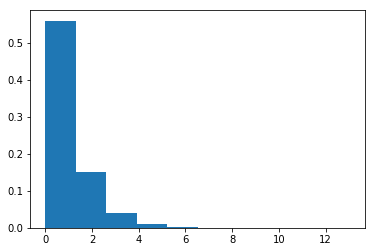

In [207]:
expo = stats.expon.rvs(size = 1000000)
plt.hist(expo, normed = 1)
print ('Média real da população:', expo.mean())
print ()
print ('Variância dos dados', expo.var())

In [376]:
def tlc2 (n):
    listamedias = []
    listaz = []
    listat = []

    for j in range (0,100):
        amostra = []
        for i in range(n):
            amostra.append(np.random.choice(expo))
    

        z =  ((np.mean(amostra) - expo.mean())/(expo.std())/(1000))
        t =  ((np.mean(amostra) - expo.mean())/(np.std(amostra))/(1000))
        listaz.append (z)
        listat.append (t)
        
        listamedias.append(np.mean(amostra))



            
    plt.hist(listamedias, color = "Navy", alpha = 0.5, normed = 1, label = 'Médias amostrais', bins = 20)
    plt.legend(loc = 'best')

            

    print ('Amostras de tamanho:', n)
    print ('Média das médias das amostras:', np.mean(listamedias))
    print ('Variância das médias:', np.var(listamedias))

    norm = sorted(stats.norm.rvs(size = 10000, loc = 0, scale = 1))

    fig, axs = plt.subplots(figsize = (8, 5))
    plt.title('Histogramas dos valores de z')
    plt.xlabel("Valores")
    plt.ylabel("Frequência relativa")

    plt.hist(z, color = "IndianRed", alpha = 0.5, normed = 0, label = 'z')
    plt.plot(norm, stats.norm.pdf(norm, loc = 0, scale = 1), lw = 3, alpha = 0.6, color = 'Black')
    plt.legend(loc = 'best')
    
    #tstud = sorted(stats.norm.rvs(size = 10000, loc = 0, scale = 1))

    
    fig, axs = plt.subplots(figsize = (8, 5))
    plt.title('Histogramas dos valores de t')
    plt.xlabel("Valores")
    plt.ylabel("Frequência relativa")

    plt.hist(t, color = "IndianRed", alpha = 0.5, normed = 0, label = 't')
    #plt.plot(tstud, stats.norm.pdf(tstud, loc = 0, scale = 1), lw = 3, alpha = 0.6, color = 'Black')
    
    
    print (listaz)
    


Amostras de tamanho: 4
Média das médias das amostras: 1.02438139788
Variância das médias: 0.26984397998
[-0.00037768414550286457, -1.8366743041090587e-05, -0.0002309976987739489, -0.00012536176571542159, 0.00045783171262436649, -0.00035014748691290196, 0.0018596812983184209, 0.00014706074639076318, 0.00060276247092948417, -5.5041778905356734e-05, 0.0001013783015591645, 7.7667046806536349e-05, -0.00082739116711434094, -0.00019818432324773686, -0.00033889446337193805, -0.00012719603844707418, -0.00038141034229770244, -0.00023398283749984523, -0.00041967089358753277, 0.00066653174461111587, 0.00065650005783672463, 0.00086267622112642364, 0.00036785870187743095, 0.00051711016494605062, 0.0013506324227655377, 0.00024412048328021892, -0.00050886241680186235, -0.00056314697272836925, -0.00032549093101581756, -0.00039269490776689851, -0.00063064472855917824, -0.00077542931317148484, 0.00014383629139385677, 0.00072652597487942935, -2.1254139818920988e-05, 0.00050612644563404515, 0.0009145032802

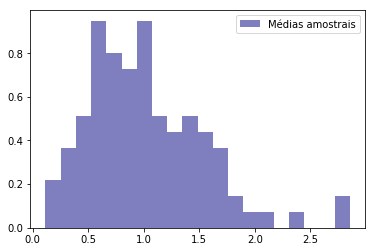

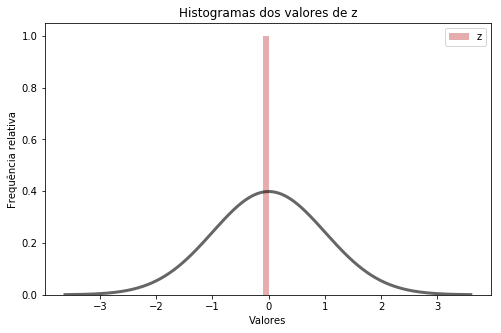

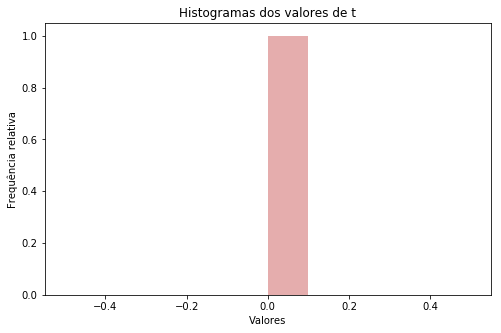

In [377]:
tlc2 (4)

In [372]:
n = 4
listamedias = []
listaz = []
listat = []

for j in range (0,10000):
    amostra = []
    for i in range(n):
        amostra.append(np.random.choice(expo))
    
    z =  ((np.mean(amostra) - expo.mean())/(expo.std())/(1000))
    t =  ((np.mean(amostra) - expo.mean())/(np.std(amostra))/(1000))
    listaz.append (z)
    listat.append (t)
    
    listamedias.append(np.mean(amostra))

KeyboardInterrupt: 

In [305]:
listaz = []

for j in range (0,10000):    

    z =  ((np.mean(amostra) - expo.mean())/(expo.std())/(1000))
    #t =  ((np.mean(amostra) - expo.mean())/(np.std(amostra))/(1000))
    listaz.append (z)
    #listat.append (t)
print (listaz)

[-0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054, -0.00024526892059616054,